In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import eyelinkio
import numpy as np
from eyelinkio import read_edf
import ctypes
from define_aoi import define_aoi

In [2]:
# enter file path
edf_file_path = '/Users/lydia/Documents/TG_2011.edf'
asc_file_path = '/Users/lydia/Documents/TG_2011.asc'

In [3]:
# read the edf
edf_file = read_edf(edf_file_path)

loadEvents = 1
setTrial End:  END
loadEvents = 1


In [4]:
df = edf_file.to_pandas()

In [6]:
screen_width = edf_file['info']['screen_coords'][0]
screen_height = edf_file['info']['screen_coords'][1]

In [36]:
PIXELS = 100
x1 = screen_width/2 - PIXELS
x2 = screen_width/2 + PIXELS
y1 = screen_height/2 - PIXELS
y2 = screen_height/2 + PIXELS

print(y1, y2)

412.0 612.0


In [8]:
SHAPE = 'rectangle'

In [9]:
aoi_parameters = [{'shape': SHAPE, 'coordinates': (x1, y1, x2, y2)}]
# print(aoi_parameters)
aoi_mask = define_aoi(screen_width, screen_height, aoi_parameters)

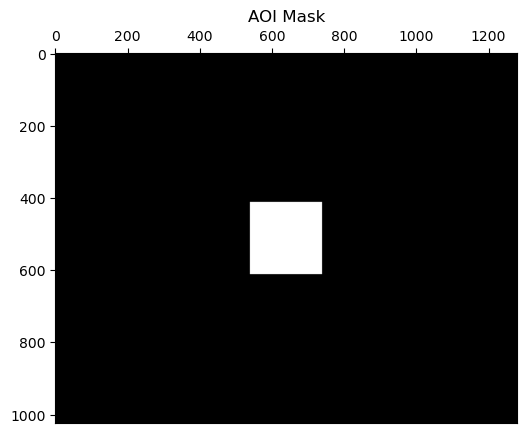

In [10]:
plt.imshow(aoi_mask, cmap='gray')
plt.title("AOI Mask")
# plt.gca().set_ylim(plt.gca().get_ylim()[::-1])
plt.gca().xaxis.tick_top()
# plt.savefig('AOI Mask.png')
plt.show()

In [ ]:
df_trials = df['discrete']['trials']
df_fixations = df['discrete']['fixations']

ratios_fixations_within = []

for row_idx, trial in df_trials.iterrows():
    print(f'trial indx: {row_idx}')
    trial_stime = trial['stime']
    trial_etime = trial['etime']

    trial_fixations = df_fixations[(df_fixations['stime'] >= trial_stime) & (df_fixations['etime'] <= trial_etime)]

    x_coor = trial_fixations['axp']
    y_coor = trial_fixations['ayp']

    num_fixations = x_coor.shape[0]

    aoi_mask = define_aoi(screen_width, screen_height, aoi_parameters)

    plt.imshow(aoi_mask, cmap='gray')
    plt.title("AOI Mask")
    # plt.gca().set_ylim(plt.gca().get_ylim()[::-1])
    plt.gca().xaxis.tick_top()
    
    plt.scatter(x_coor, y_coor, color='skyblue', marker='x', s=15)
    # plt.savefig('AOI Mask.png')
    plt.show()

    fixations_within_aoi = 0

    for x,y in zip(x_coor, y_coor):

        if (x1 <= x <= x2) and (y1 <= y <= y2):
            fixations_within_aoi += 1
            
            trial_percentage = 100* fixations_within_aoi/num_fixations
            
    ratios_fixations_within.append(trial_percentage)
    

In [50]:
print(ratios_fixations_within)

[46.0, 34.883720930232556, 41.666666666666664, 35.294117647058826, 39.02439024390244, 46.666666666666664, 42.5531914893617, 37.77777777777778, 48.57142857142857, 40.42553191489362, 39.02439024390244, 28.571428571428573, 41.86046511627907, 33.333333333333336, 38.46153846153846, 53.48837209302326, 40.0, 37.142857142857146, 47.5, 44.18604651162791, 45.0, 47.5, 45.833333333333336, 51.351351351351354, 45.714285714285715, 35.714285714285715, 50.98039215686274, 26.31578947368421, 53.333333333333336, 57.142857142857146, 60.0, 69.23076923076923, 20.0, 52.63157894736842, 64.28571428571429, 57.142857142857146, 60.0, 79.16666666666667, 66.66666666666667, 72.72727272727273, 60.0, 81.81818181818181, 80.0, 57.142857142857146, 27.586206896551722, 50.0, 35.8974358974359, 26.19047619047619, 36.58536585365854, 40.54054054054054, 34.285714285714285, 32.55813953488372, 31.914893617021278, 33.333333333333336, 43.24324324324324, 54.285714285714285, 30.232558139534884, 42.857142857142854, 25.0, 40.47619047619

AttributeError: 'list' object has no attribute 'dtype'